# ***SUPERCONDUCTIVITY DATA***

---







# **1.SVM METHOD**

*A:Data Loading and Feature Selection*

In [69]:
import pandas as pd
import random

# Load the dataset
data = pd.read_csv('/content/train.csv')
print(data)

# Randomly select 10 features from your dataset
selected_features = random.sample(data.columns[:-1].tolist(), 10)  # Exclude the target variable

# Print the selected features
print("Selected Features:", selected_features)


       number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
21258                   4        106.957877             53.095769   
21259                   5         92.266740             49.021367   
21260                   2         99.663190             95.609104   
21261                   2         99.663190             97.095602   
21262                   3         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592              36.116612             1.181795   
1              73.132787   

*B:Data Preprocessing*

In [70]:
subset = data.iloc[:10000]

# Data Preprocessing
X = subset[selected_features]  # Features
y = subset['critical_temp']  # Target variable

# Impute missing values with the mean of each column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


*C:Visualization of Selected Features*

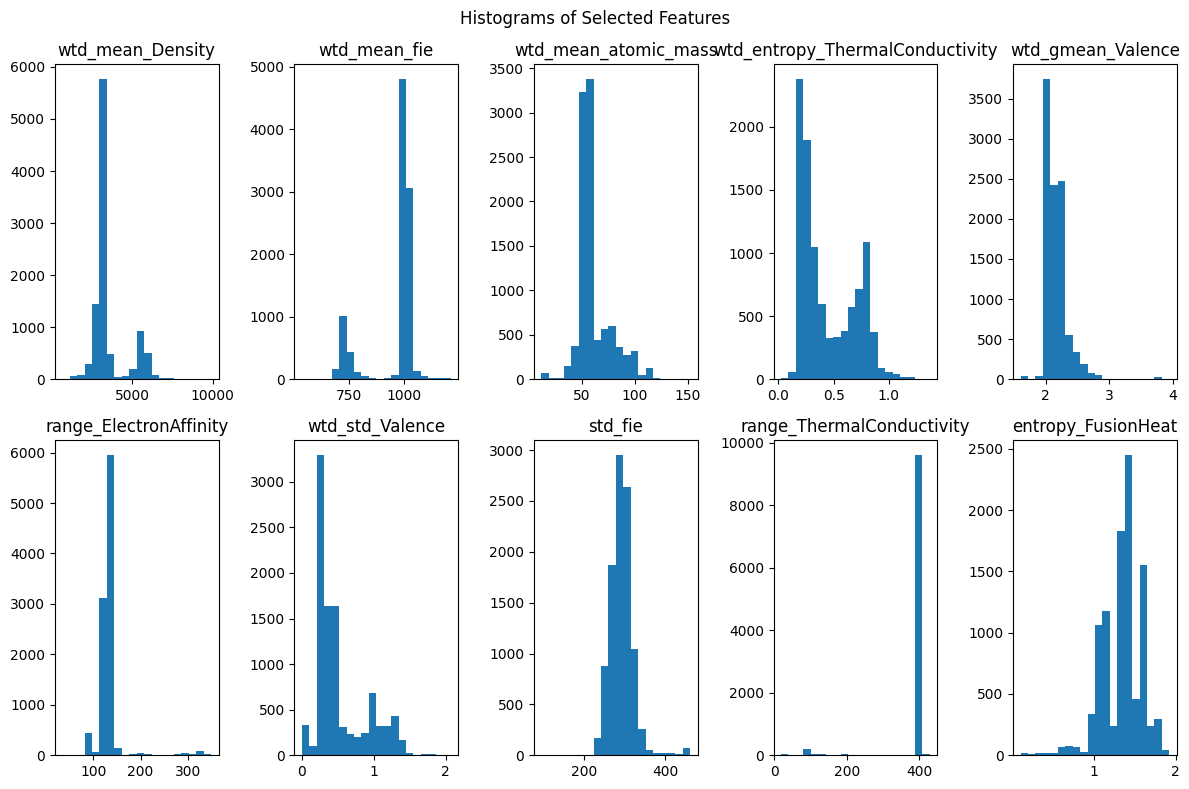

In [71]:
import matplotlib.pyplot as plt

# Visualize the selected features as histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 5, i + 1)
    plt.hist(X[:, i], bins=20)
    plt.title(feature)
plt.suptitle("Histograms of Selected Features")
plt.tight_layout()
plt.show()


*D:Min-Max Scaling*

In [72]:
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


*E:Splitting Data into Training and Testing Sets*

In [73]:
# Split the scaled data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


*F:Model Training (Support Vector Machine)*

In [74]:
# Initialize and train the Support Vector Machine (SVM) model
from sklearn.svm import SVR

svm_model = SVR(kernel='linear')  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly', etc.)
svm_model.fit(X_train, y_train)


SVR(kernel='linear')

*G:Model Evaluation and Visualization*

Mean Squared Error (MSE): 730.5168607405917
Root Mean Squared Error (RMSE): 27.028075416880718
R-squared (R2): 0.26%


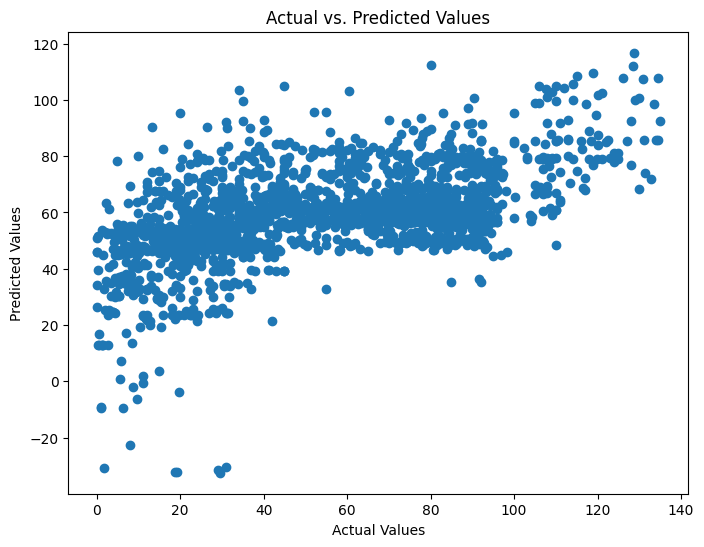

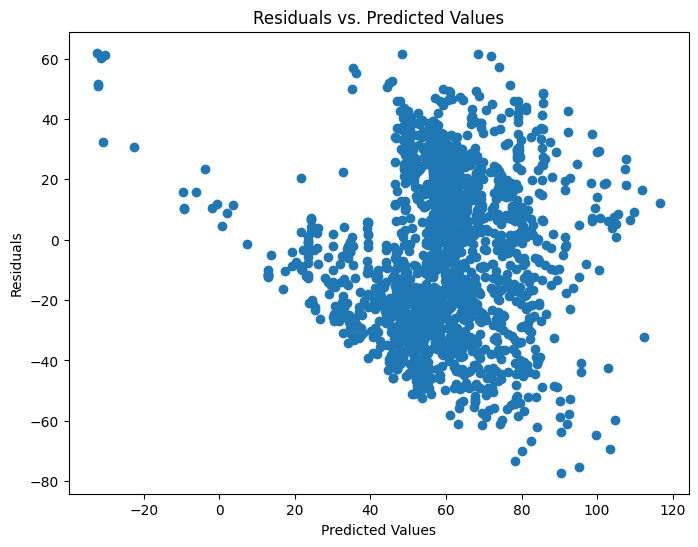

In [75]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

svm_mse = mean_squared_error(y_test, y_pred)
rmse = svm_mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {svm_mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2:.2f}%")

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


# **2.LINEAR REGRESSION**

*A.Data Loading and Feature Selection*

In [76]:
import pandas as pd
import random

# Load the dataset
data = pd.read_csv('/content/train.csv')
print(data)

# Randomly select 10 features from your dataset
selected_features = random.sample(data.columns[:-1].tolist(), 10)  # Exclude the target variable

# Print the selected features
print("Selected Features:", selected_features)


       number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
21258                   4        106.957877             53.095769   
21259                   5         92.266740             49.021367   
21260                   2         99.663190             95.609104   
21261                   2         99.663190             97.095602   
21262                   3         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592              36.116612             1.181795   
1              73.132787   

*B.Data Preprocessing*

In [77]:
  subset = data.iloc[:10000]

# Data Preprocessing
X = subset[selected_features]  # Features
y = subset['critical_temp']  # Target variable

# Impute missing values with the mean of each column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


*C.Visualization of Selected Features*

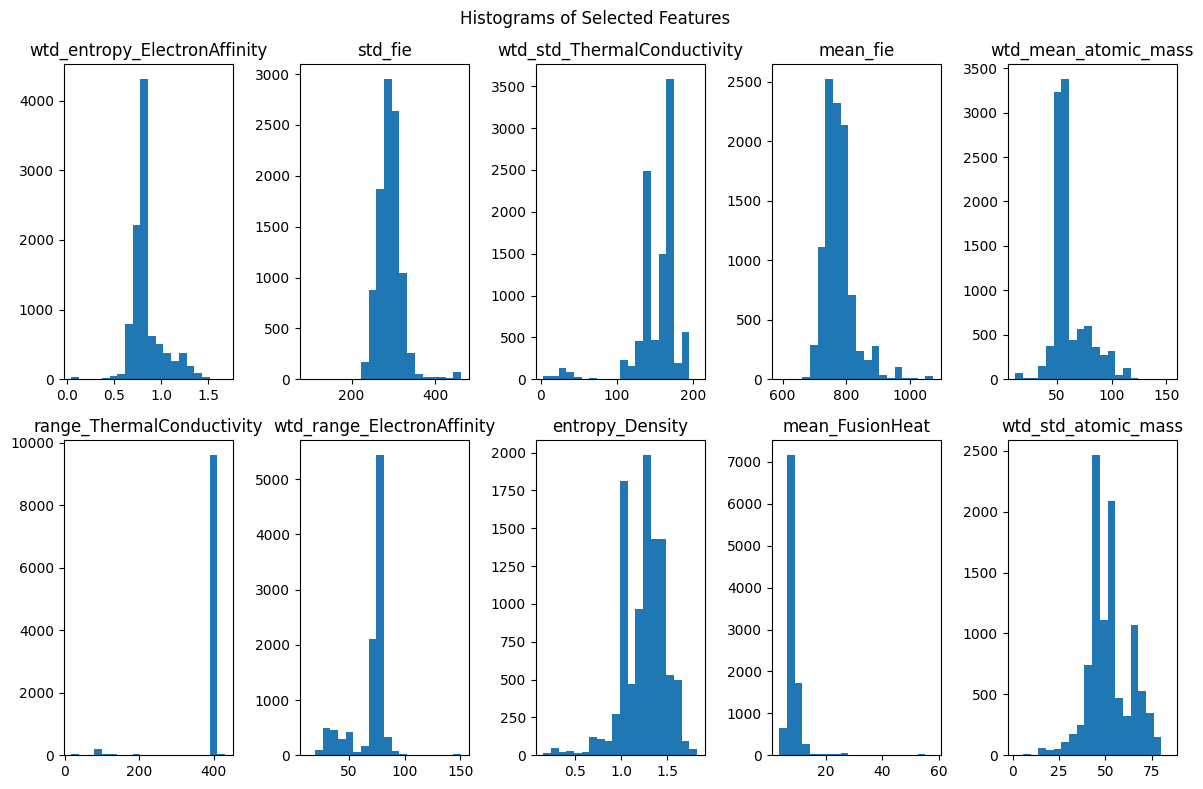

In [78]:
import matplotlib.pyplot as plt

# Visualize the selected features as histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 5, i + 1)
    plt.hist(X[:, i], bins=20)
    plt.title(feature)
plt.suptitle("Histograms of Selected Features")
plt.tight_layout()
plt.show()


*D.Min-Max Scaling*

In [79]:
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


*E.Data Splitting*

In [80]:
# Split the scaled data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


*F.Model Training (Linear Regression)*

In [81]:
# Initialize and train the Linear Regression model
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

*G.Model Evaluation and Metrics*

In [82]:
# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

lr_mse = mean_squared_error(y_test, y_pred)
rmse =lr_mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {lr_mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2:.2f}%")


Mean Squared Error (MSE): 593.293338135927
Root Mean Squared Error (RMSE): 24.35761355584588
R-squared (R2): 0.40%


*H.Visualization of Results*

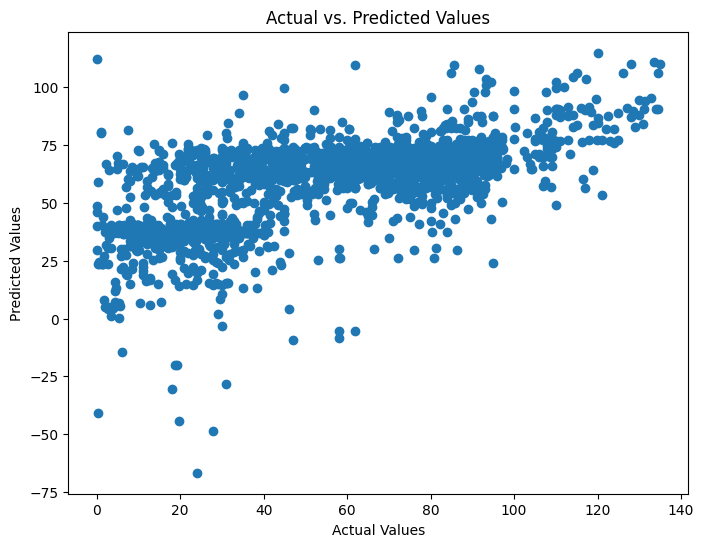

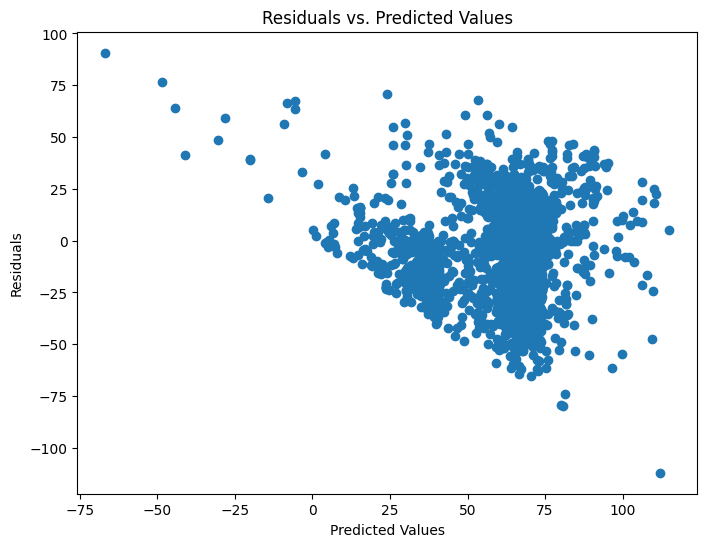

In [83]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


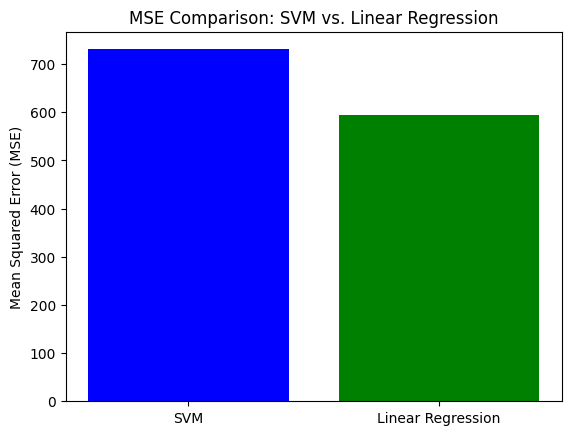

In [84]:
import matplotlib.pyplot as plt
models = ['SVM', 'Linear Regression']
mse_values = [svm_mse, lr_mse]

plt.bar(models, mse_values, color=['blue', 'green'])
plt.title('MSE Comparison: SVM vs. Linear Regression')
plt.ylabel('Mean Squared Error (MSE)')

# Show the bar graph
plt.show()
